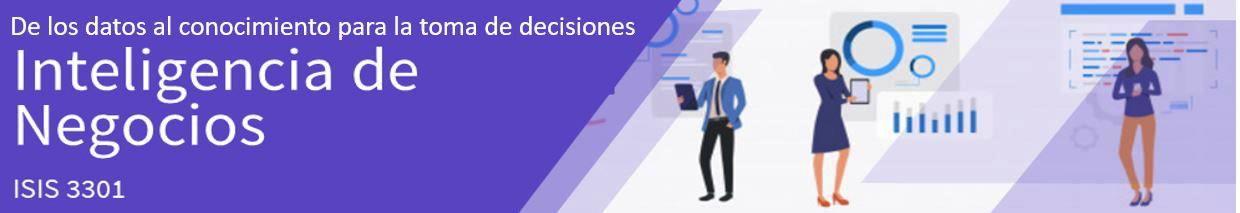

# Ejecución de los modelos entrenados (NLP) | Proyecto 1 Inteligencia de Negocios

In [1]:
import string

import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_colwidth', None)

In [2]:
# Descargando las stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ElRey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Función para tokenizar los comentarios
def tokenizer(text):
    tt = TweetTokenizer()
    tokens = tt.tokenize(text)
    return tokens

### Cargando los datos

In [4]:
comments_df = pd.read_csv('./data/SuicidiosProyecto.csv', sep = ',')

In [5]:
comments_df.shape

(195700, 3)

In [6]:
comments_df.sample(5)

,Unnamed: 0,text,class
81870,91930,"Could use a earSee title. Never opened up to anyone about this, but figured it was worth a shot.",suicide
125927,245026,Should I buy Slender: The Arrival on Switch? It’s on sale but I already have it on Xbox so I’m kind of split on if I should buy it,non-suicide
2274,212989,"Goodnight everyone I'm going to bed now, but in the morning I'll give a random comment a small reward:)\n\nAll the comment needs is something that happened that was good today:)",non-suicide
151476,202422,"I’m tired of being worthless, I’ve never wanted anything more in my life than suicide. I’m tired of being seen as faking these feelingsOnce the lockdown of my cities area is lifted. I can have time alone to successfully exit this world without being seen",suicide
150463,201134,"I just want to fucking dieIf there's no chance of me ever settling down and being depressed and alone the rest of my life I don't want to continue. I feel like SHIT right now and I have absolutely not support so I just sit here feeling sorry for myself. I haven't felt this bad in a long, long time. I WANT TO DIE.",suicide


In [7]:
comments_df['class'].value_counts(dropna = False, normalize = True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

### Filtrando los comentarios sin etiquetar

In [8]:
comments_labeled_df = comments_df.loc[comments_df['class'].notnull()]
# comentarios a ser usados para entrenar y evaluar el modelo
comments_labeled_df.shape
# comentarios descartados debido a que no se encuentran etiquetados
comments_df.loc[comments_df['class'].isnull()].shape
comments_labeled_df['class'].value_counts(dropna = False, normalize = True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

### Diviendo los comentarios etiquetados en los conjuntos de entrenamiento y prueba

In [9]:
# El parámetro 'stratify' es útil para asegurar que ambos conjuntos de datos queden aproximadamente balanceados
X_train, X_test, y_train, y_test = train_test_split(comments_labeled_df['text'], comments_labeled_df['class'], test_size = 0.2, stratify = comments_labeled_df['class'], random_state = 1)

### Vectorizando los comentarios

In [10]:
tfidf = TfidfVectorizer(tokenizer = tokenizer, stop_words = stop_words, lowercase=True)

In [11]:
X_tfidf = tfidf.fit_transform(X_train)

In [12]:
len(tfidf.vocabulary_)

158687

### Entrenando y evaluando un modelo usado TF-IDF

In [13]:
from joblib import load

lr = load("./models/logistic_regression.joblib")
random_forest = load("./models/random_forest.joblib")
neural_network = load("./models/neural_network.joblib")

In [14]:
lr_predict_train = lr.predict(X_tfidf)
lr_predict_test = lr.predict(tfidf.transform(X_test))

forest_predict_train = random_forest.predict(X_tfidf)
forest_predict_test = random_forest.predict(tfidf.transform(X_test))

neural_predict_train = neural_network.predict(X_tfidf)
neural_predict_test = neural_network.predict(tfidf.transform(X_test))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   20.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   48.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:  1.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   14.9s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:   19.5s finished


### Regresión Logística

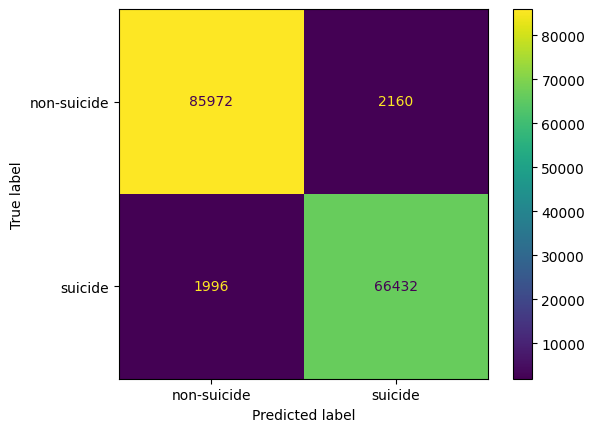

In [15]:
ConfusionMatrixDisplay.from_predictions(y_train, lr_predict_train)

In [16]:
print("\n"+classification_report(y_train, lr_predict_train))


              precision    recall  f1-score   support

 non-suicide       0.98      0.98      0.98     88132
     suicide       0.97      0.97      0.97     68428

    accuracy                           0.97    156560
   macro avg       0.97      0.97      0.97    156560
weighted avg       0.97      0.97      0.97    156560



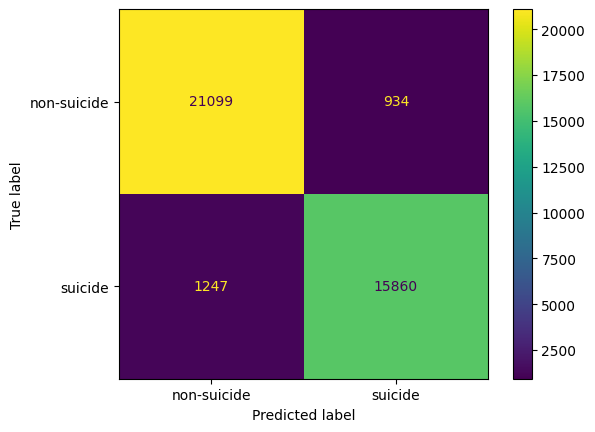

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, lr_predict_test)

In [18]:
print("\n"+classification_report(y_test, lr_predict_test))


              precision    recall  f1-score   support

 non-suicide       0.94      0.96      0.95     22033
     suicide       0.94      0.93      0.94     17107

    accuracy                           0.94     39140
   macro avg       0.94      0.94      0.94     39140
weighted avg       0.94      0.94      0.94     39140



### Random Forest

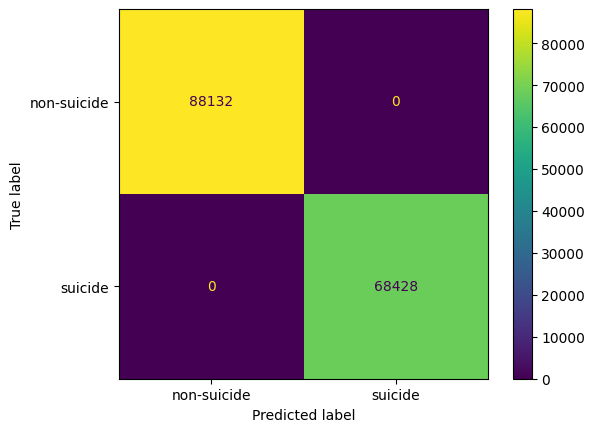

In [19]:
ConfusionMatrixDisplay.from_predictions(y_train, forest_predict_train)

In [20]:
print("\n"+classification_report(y_train, forest_predict_train))


              precision    recall  f1-score   support

 non-suicide       1.00      1.00      1.00     88132
     suicide       1.00      1.00      1.00     68428

    accuracy                           1.00    156560
   macro avg       1.00      1.00      1.00    156560
weighted avg       1.00      1.00      1.00    156560



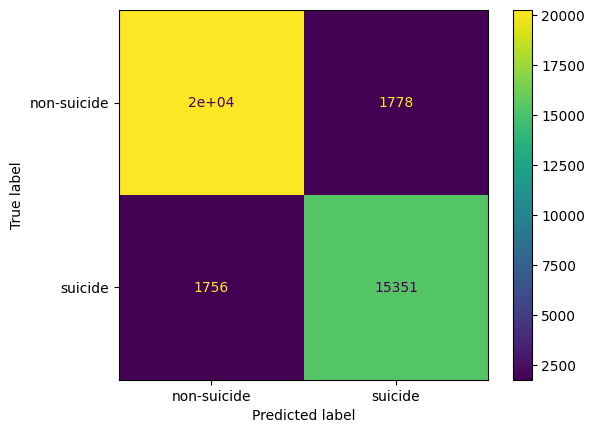

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, forest_predict_test)

In [22]:
print("\n"+classification_report(y_test, forest_predict_test))


              precision    recall  f1-score   support

 non-suicide       0.92      0.92      0.92     22033
     suicide       0.90      0.90      0.90     17107

    accuracy                           0.91     39140
   macro avg       0.91      0.91      0.91     39140
weighted avg       0.91      0.91      0.91     39140



### Red Neuronal

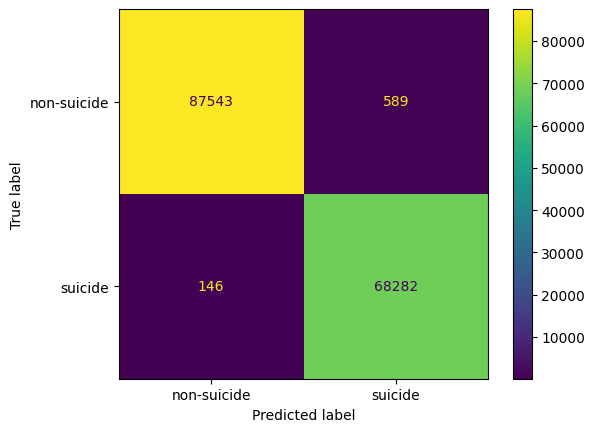

In [23]:
ConfusionMatrixDisplay.from_predictions(y_train, neural_predict_train)

In [24]:
print("\n"+classification_report(y_train, neural_predict_train))


              precision    recall  f1-score   support

 non-suicide       1.00      0.99      1.00     88132
     suicide       0.99      1.00      0.99     68428

    accuracy                           1.00    156560
   macro avg       0.99      1.00      1.00    156560
weighted avg       1.00      1.00      1.00    156560



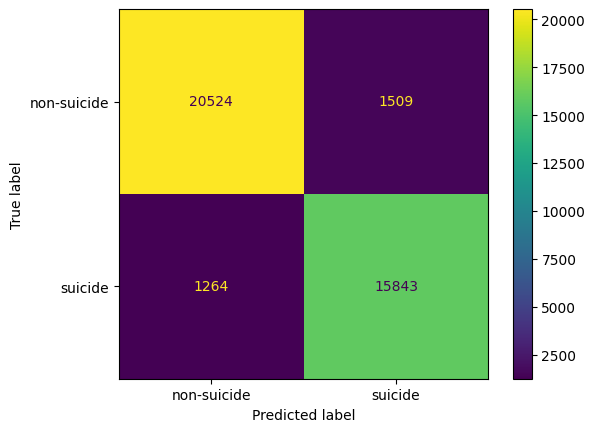

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, neural_predict_test)

In [26]:
print("\n"+classification_report(y_test, neural_predict_test))


              precision    recall  f1-score   support

 non-suicide       0.94      0.93      0.94     22033
     suicide       0.91      0.93      0.92     17107

    accuracy                           0.93     39140
   macro avg       0.93      0.93      0.93     39140
weighted avg       0.93      0.93      0.93     39140

